In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

import sklearn

#----- 수치형 변환
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import Binarizer
#----- PCA(차원축소:주성분분석)
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

#----- 분류 모델
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#----- 외부 모델(구글)
# import xgboost as xgb
# import lightgbm as lgb
from catboost import CatBoostClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#------데이터 임의적으로 늘리기 + 파이프라인
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN

#----- 정규화/스케일러
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#----- 교차검증
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate, GridSearchCV, cross_val_score
                                       
#----- 분류 평가 매트릭스
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve 
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, multilabel_confusion_matrix

# matplotlib 차트 스타일을 seaborn 스타일로 설정
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [2]:
df = pd.read_csv("../data/train.csv")
df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [3]:
df = df.drop('id',axis=1)
df.columns = ['bl','rf','hl','soul','c','target']
df.head(20)

,bl,rf,hl,soul,c,target
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost
5,0.405680,0.253277,0.441420,0.280324,green,Goblin
6,0.399331,0.568952,0.618391,0.467901,white,Goblin
7,0.516224,0.536429,0.612776,0.468048,clear,Ghoul
8,0.314295,0.671280,0.417267,0.227548,blue,Ghost
9,0.280942,0.701457,0.179633,0.141183,white,Ghost


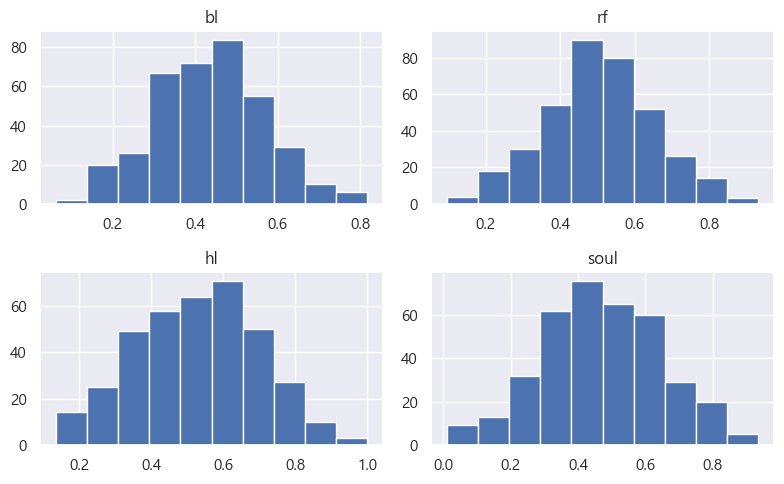

In [4]:
df.hist(figsize=(8,5))
plt.tight_layout()
plt.show()

In [5]:
df['c'].unique()

array(['clear', 'green', 'black', 'white', 'blue', 'blood'], dtype=object)

In [6]:
dfc = df.copy()

le_feature = LabelEncoder()
dfc['c'] = le_feature.fit_transform(df['c'])
dfc.head(20)

,bl,rf,hl,soul,c,target
0,0.354512,0.350839,0.465761,0.781142,3,Ghoul
1,0.575560,0.425868,0.531401,0.439899,4,Goblin
2,0.467875,0.354330,0.811616,0.791225,0,Ghoul
3,0.776652,0.508723,0.636766,0.884464,0,Ghoul
4,0.566117,0.875862,0.418594,0.636438,4,Ghost
5,0.405680,0.253277,0.441420,0.280324,4,Goblin
6,0.399331,0.568952,0.618391,0.467901,5,Goblin
7,0.516224,0.536429,0.612776,0.468048,3,Ghoul
8,0.314295,0.671280,0.417267,0.227548,2,Ghost
9,0.280942,0.701457,0.179633,0.141183,5,Ghost


# 점수 보기

In [7]:
# 타겟 인코딩
le_target = LabelEncoder()
dfc['target'] = le_target.fit_transform(dfc['target'])

y = dfc['target']
X = dfc.drop('target', axis=1)

X.shape, y.shape

((371, 5), (371,))

In [10]:
dfc.head()

,bl,rf,hl,soul,c,target
0,0.354512,0.350839,0.465761,0.781142,3,1
1,0.575560,0.425868,0.531401,0.439899,4,2
2,0.467875,0.354330,0.811616,0.791225,0,1
3,0.776652,0.508723,0.636766,0.884464,0,1
4,0.566117,0.875862,0.418594,0.636438,4,0


In [12]:
X_80,X_20,y_80,y_20 = train_test_split(X,y, test_size=0.2, random_state=8989)


model_list = [LogisticRegression(random_state=8989)
              ,SVC(random_state=8989)
              ,DecisionTreeClassifier(random_state=8989)
              ,RandomForestClassifier(random_state=8989)
             ]
# XGB,LGBM 0.6800 너무 적게 나옴.

for model in model_list :
    model.fit(X_80,y_80)
    pred = model.predict(X_20)
    acc_score = accuracy_score(y_20, pred)
    print(f"{acc_score:.4f},{model.__class__.__name__}")

0.7467,LogisticRegression
0.6933,SVC
0.6933,DecisionTreeClassifier
0.7333,RandomForestClassifier


In [13]:
cols = X.columns
cols.isna()

array([False, False, False, False, False])

In [14]:
for col in cols :
    print(col, df[col].isin([0]).sum())

bl 0
rf 0
hl 0
soul 0
c 0


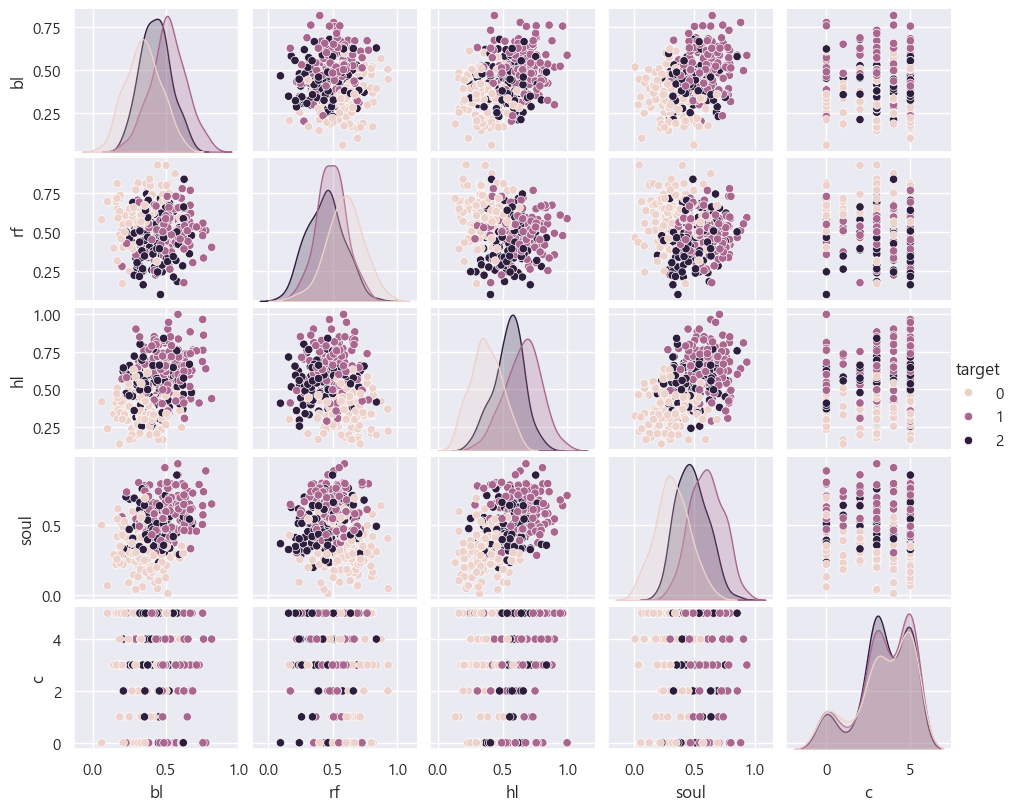

In [15]:
g = sns.pairplot(data = dfc,
                 hue="target" 
                 , diag_kind="kde"            #대각선 그래프 종류: "hist"(기본), "kde"
            )
g.fig.set_size_inches(10, 8)               # 여기서 사이즈 조정
plt.show()

# 스케일링

In [19]:
scaler_list=[StandardScaler(), MinMaxScaler(), RobustScaler()]
for sc in scaler_list :
    sc.fit(X_80)
    X_80_scale = sc.transform(X_80)
    X_20_scale = sc.transform(X_20)
    model = LogisticRegression(random_state=8989)
    model.fit(X_80_scale,y_80)
    pred = model.predict(X_20_scale)
    acc_score = accuracy_score(y_20, pred)
    print(f"{acc_score:.4f},{sc.__class__.__name__}")

0.7600,StandardScaler
0.7600,MinMaxScaler
0.7600,RobustScaler


In [20]:
# 제일 좋았던 Logistic 했을때 0.7467 -> 0.76

# GridSearchCv 진입

In [31]:
kf = StratifiedKFold(n_splits=5, random_state=4545, shuffle=True)
model = LogisticRegression(random_state=8989, max_iter=500)

myprm = {'C':[0.4899,0.49,0.4901]}
# 1st [0.1,0.5,1.0]
# 2nd [0.4,0.5,0.6]
# 3rd [0.49,0.5,0.51]
# 4th [0.48,0.49,0.51]
# 5th [0.489,0.49,0.491]

cv_model = GridSearchCV(model,scoring="accuracy", cv=kf, param_grid=myprm)
cv_model.fit(X,y)
print(cv_model.best_params_)
print(f"{cv_model.best_score_:.4f}")
resdf = pd.DataFrame(cv_model.cv_results_)
resdf

{'C': 0.49}
0.7358


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008053,0.007125,0.000204,0.000409,0.4899,{'C': 0.4899},0.746667,0.675676,0.770270,0.77027,0.702703,0.733117,0.037865,2
1,0.006114,0.000785,0.001087,0.000161,0.4900,{'C': 0.49},0.746667,0.675676,0.783784,0.77027,0.702703,0.735820,0.040790,1
2,0.005589,0.005894,0.000201,0.000401,0.4901,{'C': 0.4901},0.746667,0.675676,0.770270,0.77027,0.702703,0.733117,0.037865,2


# KF

In [84]:
kf = StratifiedKFold(n_splits=10, random_state=4545, shuffle=True)

model_list = [
    LogisticRegression(random_state=8989),
    SVC(random_state=8989),
    DecisionTreeClassifier(random_state=8989),
    RandomForestClassifier(random_state=8989)
]

for model in model_list:
    scores = []   # fold별 점수 저장
    for i, (train_index, test_index) in enumerate(kf.split(X, y)): #------------- y도 같이 들어감
        X80, X20 = X.iloc[train_index], X.iloc[test_index]
        y80, y20 = y.iloc[train_index], y.iloc[test_index]

        model.fit(X80, y80)
        pred = model.predict(X20)
        acc_score = accuracy_score(y20, pred)
        scores.append(acc_score)
        print(f"Fold {i} - {model.__class__.__name__}: {acc_score:.4f}")

    # 평균 출력
    print(f"평균 정확도 ({model.__class__.__name__}): {np.mean(scores):.4f}\n")

Fold 0 - LogisticRegression: 0.8158
Fold 1 - LogisticRegression: 0.7027
Fold 2 - LogisticRegression: 0.6757
Fold 3 - LogisticRegression: 0.6486
Fold 4 - LogisticRegression: 0.7838
Fold 5 - LogisticRegression: 0.8108
Fold 6 - LogisticRegression: 0.7838
Fold 7 - LogisticRegression: 0.8378
Fold 8 - LogisticRegression: 0.7027
Fold 9 - LogisticRegression: 0.7568
평균 정확도 (LogisticRegression): 0.7518

Fold 0 - SVC: 0.7368
Fold 1 - SVC: 0.6757
Fold 2 - SVC: 0.7027
Fold 3 - SVC: 0.6757
Fold 4 - SVC: 0.7838
Fold 5 - SVC: 0.7838
Fold 6 - SVC: 0.7297
Fold 7 - SVC: 0.8108
Fold 8 - SVC: 0.7027
Fold 9 - SVC: 0.7568
평균 정확도 (SVC): 0.7358

Fold 0 - DecisionTreeClassifier: 0.7105
Fold 1 - DecisionTreeClassifier: 0.6216
Fold 2 - DecisionTreeClassifier: 0.6757
Fold 3 - DecisionTreeClassifier: 0.5405
Fold 4 - DecisionTreeClassifier: 0.6757
Fold 5 - DecisionTreeClassifier: 0.7297
Fold 6 - DecisionTreeClassifier: 0.6216
Fold 7 - DecisionTreeClassifier: 0.5405
Fold 8 - DecisionTreeClassifier: 0.6486
Fold 9 - De

# 1차 최종 모델 : RobustScaler + Logistic Classifier + GridSearchCV

In [43]:
RobustScaler().fit(X_80)
X_80_scale = sc.transform(X_80)
X_20_scale = sc.transform(X_20)
model = LogisticRegression(random_state=8989)
model.fit(X_80_scale,y_80)
pred = model.predict(X_20_scale)
acc_score = accuracy_score(y_20, pred)
print(f"{acc_score:.4f},{sc.__class__.__name__}")

0.7600,RobustScaler


In [59]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train_ids = train['id']
test_ids = test['id']

X = train.drop(['id', 'type'], axis=1)
y = train['type']

X_test = test.drop(['id'], axis=1)

X.columns = ['bl','rf','hl','soul','c']
X_test.columns = ['bl','rf','hl','soul','c']

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

le_feature = LabelEncoder()
X['c'] = le_feature.fit_transform(X['c'])
X_test['c'] = le_feature.transform(X_test['c'])

X_80, X_20, y_80, y_20 = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

pipeline = Pipeline([
    ('scaler', RobustScaler()),            # 숫자형 스케일링
    ('model', LogisticRegression(
        random_state=42,
        max_iter=500
    ))
])

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'model__C': [0.1, 0.11, 0.12]}  # Pipeline 내 모델은 '모델명__파라미터' 형태

cv_model = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=kf
)

cv_model.fit(X_80, y_80)

print("Best Params:", cv_model.best_params_)
print(f"Best CV Accuracy: {cv_model.best_score_:.4f}")

pred = cv_model.predict(X_test)

pred_labels = le_target.inverse_transform(pred)

submission = pd.DataFrame({
    "id": test_ids,
    "type": pred_labels
})

submission.to_csv("submission1.csv", index=False)
print("Submission file saved!")

Best Params: {'model__C': 0.11}
Best CV Accuracy: 0.7464
Submission file saved!


In [60]:
# 공모전 점수 Score: 0.73156

# 그냥 Robust만 멕였을때 점수 확인

In [62]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train_ids = train['id']
test_ids = test['id']

X = train.drop(['id', 'type'], axis=1)
y = train['type']

X_test = test.drop(['id'], axis=1)

X.columns = ['bl','rf','hl','soul','c']
X_test.columns = ['bl','rf','hl','soul','c']

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

le_feature = LabelEncoder()
X['c'] = le_feature.fit_transform(X['c'])
X_test['c'] = le_feature.transform(X_test['c'])

X_80, X_20, y_80, y_20 = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

pipeline = Pipeline([
    ('scaler', RobustScaler()),            # 숫자형 스케일링
    ('model', LogisticRegression(
        random_state=42,
        max_iter=500
    ))
])


pipeline.fit(X_80, y_80)

pred = pipeline.predict(X_test)

pred_labels = le_target.inverse_transform(pred)

submission = pd.DataFrame({
    "id": test_ids,
    "type": pred_labels
})

submission.to_csv("submission2.csv", index=False)
print("Submission file saved!")

Submission file saved!


In [63]:
#Score: 0.72022

# 좀 더 EDA

In [75]:
dfc = df.copy()

le_feature = LabelEncoder()
dfc['c'] = le_feature.fit_transform(df['c'])

le_target = LabelEncoder()
dfc['target'] = le_target.fit_transform(dfc['target'])

dfc.corr()

,bl,rf,hl,soul,c,target
bl,1.000000,-0.041716,0.353881,0.381675,-0.033830,0.241092
rf,-0.041716,1.000000,-0.220353,-0.132051,-0.041714,-0.416404
hl,0.353881,-0.220353,1.000000,0.474835,0.009093,0.397011
soul,0.381675,-0.132051,0.474835,1.000000,-0.025546,0.353404
c,-0.033830,-0.041714,0.009093,-0.025546,1.000000,0.007793
target,0.241092,-0.416404,0.397011,0.353404,0.007793,1.000000


In [70]:
# color는 거의 연관된 것이 없음. color 제외 후 학습 진행

In [77]:
y = dfc['target']
X = dfc.drop(['target','c'], axis=1)

X_80,X_20,y_80,y_20 = train_test_split(X,y, test_size=0.2, random_state=8989)

scaler_list=[StandardScaler(), MinMaxScaler(), RobustScaler()]
for sc in scaler_list :
    sc.fit(X_80)
    X_80_scale = sc.transform(X_80)
    X_20_scale = sc.transform(X_20)
    model = LogisticRegression(random_state=8989)
    model.fit(X_80_scale,y_80)
    pred = model.predict(X_20_scale)
    acc_score = accuracy_score(y_20, pred)
    print(f"{acc_score:.4f},{sc.__class__.__name__}")

0.7467,StandardScaler
0.7467,MinMaxScaler
0.7467,RobustScaler


In [78]:
# 제외하였으나 점수 떨어짐

## 스케일러는 하락, 그냥 모델은?

In [79]:
model_list = [LogisticRegression(random_state=8989)
              ,SVC(random_state=8989)
              ,DecisionTreeClassifier(random_state=8989)
              ,RandomForestClassifier(random_state=8989)
             ]
# XGB,LGBM 0.6800 너무 적게 나옴.

for model in model_list :
    model.fit(X_80,y_80)
    pred = model.predict(X_20)
    acc_score = accuracy_score(y_20, pred)
    print(f"{acc_score:.4f},{model.__class__.__name__}")

0.7733,LogisticRegression
0.7333,SVC
0.6667,DecisionTreeClassifier
0.7200,RandomForestClassifier


In [80]:
# 그냥 모델인 LogisticRegression은 높아짐

## LogisticRegression만 적용

In [119]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train_ids = train['id']
test_ids = test['id']

X = train.drop(['id', 'type', 'color'], axis=1)
y = train['type']

X_test = test.drop(['id', 'color'], axis=1)

X.columns = ['bl','rf','hl','soul']
X_test.columns = ['bl','rf','hl','soul']

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

X_80, X_20, y_80, y_20 = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)
model = LogisticRegression(random_state=8989)

model.fit(X_80,y_80)

pred = model.predict(X_test)

pred_labels = le_target.inverse_transform(pred)

submission = pd.DataFrame({
    "id": test_ids,
    "type": pred_labels
})

submission.to_csv("submission3.csv", index=False)
print("Submission file saved!")

Submission file saved!


In [83]:
# Score: 0.73724

# 앙상블 적용

In [64]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier

In [102]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train_ids = train['id']
test_ids = test['id']

X = train.drop(['id', 'type'], axis=1)
y = train['type']

X_test = test.drop(['id'], axis=1)

X.columns = ['bl','rf','hl','soul','c']
X_test.columns = ['bl','rf','hl','soul','c']

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

le_feature = LabelEncoder()
X['c'] = le_feature.fit_transform(X['c'])
X_test['c'] = le_feature.transform(X_test['c'])

X_80, X_20, y_80, y_20 = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

## 보팅

In [109]:
lr = LogisticRegression(random_state=8989)
dt = DecisionTreeClassifier(random_state=8989)
sc = SVC(probability=True,random_state=8989)
rf = RandomForestClassifier(random_state=8989)

vo_model44 = VotingClassifier(estimators = [('lr',lr),('dt',dt),('sc',sc),('rf',rf)],voting='soft'
                             , weights=[1,1,1,1]  
                             )
vo_model44.fit(X_80, y_80)
pred = vo_model44.predict(X_20)
acc = accuracy_score(y_20, pred)
print( f" {acc:.4f}" )

 0.7333


## 배깅

In [89]:
bg_model = BaggingClassifier(estimator=dt, n_estimators=10, random_state=8989, oob_score=True)

bg_model.fit(X_80, y_80)
print(f"OOB Score : {bg_model.oob_score_:.4f}")

pred = bg_model.predict(X_20)
acc = accuracy_score(y_20, pred)
print( f" {acc:.4f}" )

OOB Score : 0.6824
 0.7333


## StackingClassifier

In [101]:
from sklearn.ensemble import StackingClassifier

lr = LogisticRegression(random_state=42)
sc = SVC(probability=True,random_state=42)
rf = RandomForestClassifier(random_state=42)
kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

stack_model = StackingClassifier(estimators = [('lr',lr),('sc',sc),('rf',rf)]
                                 , final_estimator= LogisticRegression(random_state=42)
                                 , cv=kf)
stack_model.fit(X_80,y_80)
pred = stack_model.predict(X_20)
acc = accuracy_score(y_20, pred)
print( f" {acc:.4f}" )

 0.8133


## 컬러 삭제도 확인

In [105]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train_ids = train['id']
test_ids = test['id']

X = train.drop(['id', 'type', 'color'], axis=1)
y = train['type']

X_test = test.drop(['id','color'], axis=1)

X.columns = ['bl','rf','hl','soul']
X_test.columns = ['bl','rf','hl','soul']

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

X_80, X_20, y_80, y_20 = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [106]:
from sklearn.ensemble import StackingClassifier

lr = LogisticRegression(random_state=42)
sc = SVC(probability=True,random_state=42)
rf = RandomForestClassifier(random_state=42)
kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

stack_model = StackingClassifier(estimators = [('lr',lr),('sc',sc),('rf',rf)]
                                 , final_estimator= LogisticRegression(random_state=42)
                                 , cv=kf)
stack_model.fit(X_80,y_80)
pred = stack_model.predict(X_20)
acc = accuracy_score(y_20, pred)
print( f" {acc:.4f}" )

 0.8133


# StackingClassifier 진행

In [98]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train_ids = train['id']
test_ids = test['id']

X = train.drop(['id', 'type', 'color'], axis=1)
y = train['type']

X_test = test.drop(['id', 'color'], axis=1)

X.columns = ['bl','rf','hl','soul']
X_test.columns = ['bl','rf','hl','soul']

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

X_80, X_20, y_80, y_20 = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)
lr = LogisticRegression(random_state=42)
sc = SVC(probability=True,random_state=42)
rf = RandomForestClassifier(random_state=42)
kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

stack_model = StackingClassifier(estimators = [('lr',lr),('sc',sc),('rf',rf)]
                                 , final_estimator= LogisticRegression(random_state=42)
                                 , cv=kf)
stack_model.fit(X_80,y_80)

pred = stack_model.predict(X_test)

pred_labels = le_target.inverse_transform(pred)

submission = pd.DataFrame({
    "id": test_ids,
    "type": pred_labels
})

submission.to_csv("submission4.csv", index=False)
print("Submission file saved!")

Submission file saved!


In [95]:
#Score: 0.72211

## color 안뺏을때

In [99]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train_ids = train['id']
test_ids = test['id']

X = train.drop(['id', 'type'], axis=1)
y = train['type']

X_test = test.drop(['id'], axis=1)

X.columns = ['bl','rf','hl','soul','c']
X_test.columns = ['bl','rf','hl','soul','c']

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

le_feature = LabelEncoder()
X['c'] = le_feature.fit_transform(X['c'])
X_test['c'] = le_feature.transform(X_test['c'])

X_80, X_20, y_80, y_20 = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

lr = LogisticRegression(random_state=42)
sc = SVC(probability=True,random_state=42)
rf = RandomForestClassifier(random_state=42)
kf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

stack_model = StackingClassifier(estimators = [('lr',lr),('sc',sc),('rf',rf)]
                                 , final_estimator= LogisticRegression(random_state=42)
                                 , cv=kf)
stack_model.fit(X_80,y_80)

pred = stack_model.predict(X_test)

pred_labels = le_target.inverse_transform(pred)

submission = pd.DataFrame({
    "id": test_ids,
    "type": pred_labels
})

submission.to_csv("submission5.csv", index=False)
print("Submission file saved!")

Submission file saved!


In [100]:
#Score: 0.72589

## 보팅 웨이트 자동 계산

In [110]:
models = {
    'lr': LogisticRegression(random_state=8989),
    'dt': DecisionTreeClassifier(random_state=8989),
    'sc': SVC(probability=True, random_state=8989),
    'rf': RandomForestClassifier(random_state=8989)
}

weights = []
for name, m in models.items():
    m.fit(X_80, y_80)
    pred = m.predict(X_20)
    acc = accuracy_score(y_20, pred)
    weights.append(acc)
    print(f"{name} acc: {acc:.4f}")

print("→ weights:", weights)

# 가중치 기반 투표
vo_model = VotingClassifier(
    estimators=list(models.items()),
    voting='soft',
    weights=weights
)

vo_model.fit(X_80, y_80)
pred = vo_model.predict(X_20)
acc = accuracy_score(y_20, pred)
print(f"Final Voting Accuracy: {acc:.4f}")

lr acc: 0.8533
dt acc: 0.6133
sc acc: 0.8000
rf acc: 0.7600
→ weights: [0.8533333333333334, 0.6133333333333333, 0.8, 0.76]
Final Voting Accuracy: 0.7600


In [111]:
lr = LogisticRegression(random_state=8989)
dt = DecisionTreeClassifier(random_state=8989)
sc = SVC(probability=True,random_state=8989)
rf = RandomForestClassifier(random_state=8989)

vo_model44 = VotingClassifier(estimators = [('lr',lr),('dt',dt),('sc',sc),('rf',rf)],voting='soft'
                             , weights=[0.8533333333333334, 0.6133333333333333, 0.8, 0.76]  
                             )
vo_model44.fit(X_80, y_80)
pred = vo_model44.predict(X_20)
acc = accuracy_score(y_20, pred)
print( f" {acc:.4f}" )

 0.7600


# 다른것도 한번씩

In [112]:
lr = LogisticRegression(random_state=8989)
dt = DecisionTreeClassifier(random_state=8989)
sc = SVC(probability=True,random_state=8989)
rf = RandomForestClassifier(random_state=8989)

vo_model44 = VotingClassifier(estimators = [('lr',lr),('dt',dt),('sc',sc),('rf',rf)],voting='soft'
                             , weights=[0.8533333333333334, 0.6133333333333333, 0.8, 0.76]
                             )

train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train_ids = train['id']
test_ids = test['id']

X = train.drop(['id', 'type'], axis=1)
y = train['type']

X_test = test.drop(['id'], axis=1)

X.columns = ['bl','rf','hl','soul','c']
X_test.columns = ['bl','rf','hl','soul','c']

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

le_feature = LabelEncoder()
X['c'] = le_feature.fit_transform(X['c'])
X_test['c'] = le_feature.transform(X_test['c'])

X_80, X_20, y_80, y_20 = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

vo_model44.fit(X_80,y_80)

pred = vo_model44.predict(X_test)

pred_labels = le_target.inverse_transform(pred)

submission = pd.DataFrame({
    "id": test_ids,
    "type": pred_labels
})

submission.to_csv("submission_vo.csv", index=False)
print("Submission file saved!")

Submission file saved!


In [113]:
lr = LogisticRegression(random_state=8989)
dt = DecisionTreeClassifier(random_state=8989)
sc = SVC(probability=True,random_state=8989)
rf = RandomForestClassifier(random_state=8989)

vo_model44 = VotingClassifier(estimators = [('lr',lr),('dt',dt),('sc',sc),('rf',rf)],voting='soft'
                             , weights=[0.8533333333333334, 0.6133333333333333, 0.8, 0.76]
                             )

train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train_ids = train['id']
test_ids = test['id']

X = train.drop(['id', 'type', 'color'], axis=1)
y = train['type']

X_test = test.drop(['id', 'color'], axis=1)

X.columns = ['bl','rf','hl','soul']
X_test.columns = ['bl','rf','hl','soul']

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

X_80, X_20, y_80, y_20 = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

vo_model44.fit(X_80,y_80)

pred = vo_model44.predict(X_test)

pred_labels = le_target.inverse_transform(pred)

submission = pd.DataFrame({
    "id": test_ids,
    "type": pred_labels
})

submission.to_csv("submission_vo_mcolor.csv", index=False)
print("Submission file saved!")

Submission file saved!


In [114]:
lr = LogisticRegression(random_state=8989)
dt = DecisionTreeClassifier(random_state=8989)
sc = SVC(probability=True,random_state=8989)
rf = RandomForestClassifier(random_state=8989)

vo_model44 = VotingClassifier(estimators = [('lr',lr),('dt',dt),('sc',sc),('rf',rf)],voting='soft'
                             , weights=[1,1,1,1]
                             )

train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train_ids = train['id']
test_ids = test['id']

X = train.drop(['id', 'type', 'color'], axis=1)
y = train['type']

X_test = test.drop(['id', 'color'], axis=1)

X.columns = ['bl','rf','hl','soul']
X_test.columns = ['bl','rf','hl','soul']

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

X_80, X_20, y_80, y_20 = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

vo_model44.fit(X_80,y_80)

pred = vo_model44.predict(X_test)

pred_labels = le_target.inverse_transform(pred)

submission = pd.DataFrame({
    "id": test_ids,
    "type": pred_labels
})

submission.to_csv("submission_vo_1111.csv", index=False)
print("Submission file saved!")

Submission file saved!


In [115]:
bg_model = BaggingClassifier(estimator=dt, n_estimators=10, random_state=8989, oob_score=True)

train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train_ids = train['id']
test_ids = test['id']

X = train.drop(['id', 'type', 'color'], axis=1)
y = train['type']

X_test = test.drop(['id', 'color'], axis=1)

X.columns = ['bl','rf','hl','soul']
X_test.columns = ['bl','rf','hl','soul']

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

X_80, X_20, y_80, y_20 = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

bg_model.fit(X_80,y_80)

pred = bg_model.predict(X_test)

pred_labels = le_target.inverse_transform(pred)

submission = pd.DataFrame({
    "id": test_ids,
    "type": pred_labels
})

submission.to_csv("submission_bag.csv", index=False)
print("Submission file saved!")

Submission file saved!


## 오버피팅 없애고 스케일러 추가

In [116]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# =============================
# 1. 데이터 로드
# =============================
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train_ids = train['id']
test_ids = test['id']

# 불필요 컬럼 제거
X = train.drop(['id', 'type', 'color'], axis=1)
y = train['type']

X_test = test.drop(['id', 'color'], axis=1)

# 컬럼명 통일
X.columns = ['bl', 'rf', 'hl', 'soul']
X_test.columns = ['bl', 'rf', 'hl', 'soul']

# =============================
# 2. 인코딩
# =============================
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

# =============================
# 3. 데이터 분할
# =============================
X_80, X_20, y_80, y_20 = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# =============================
# 4. 베이스 모델 정의 (스케일러 + 규제 강화)
# =============================

lr = Pipeline([
    ('scaler', RobustScaler()),
    ('model', LogisticRegression(C=0.5, max_iter=1000, random_state=42))
])

sc = Pipeline([
    ('scaler', RobustScaler()),
    ('model', SVC(probability=True, C=0.8, gamma='scale', random_state=42))
])

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_split=4,
    random_state=42
)

lgb = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)

# =============================
# 5. 메타 모델 (규제 강화 로지스틱)
# =============================
final_est = LogisticRegression(
    C=0.3,
    penalty='l2',
    max_iter=1000,
    random_state=42
)

# =============================
# 6. 스태킹 구조 정의
# =============================
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

stack_model = StackingClassifier(
    estimators=[
        ('lr', lr),
        ('sc', sc),
        ('rf', rf),
        ('lgb', lgb)
    ],
    final_estimator=final_est,
    cv=kf,
    n_jobs=-1
)

# =============================
# 7. 학습 및 평가
# =============================
stack_model.fit(X_80, y_80)

pred_val = stack_model.predict(X_20)
acc = accuracy_score(y_20, pred_val)
print(f"Validation Accuracy: {acc:.4f}")

# =============================
# 8. 최종 예측 및 제출 파일 생성
# =============================
pred_test = stack_model.predict(X_test)
pred_labels = le_target.inverse_transform(pred_test)

submission = pd.DataFrame({
    "id": test_ids,
    "type": pred_labels
})

submission.to_csv("submission_stack_tuned.csv", index=False)
print("✅ submission_stack_tuned.csv 파일 생성 완료!")


Validation Accuracy: 0.8400
✅ submission_stack_tuned.csv 파일 생성 완료!


In [117]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# =============================
# 1. 데이터 로드
# =============================
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train_ids = train['id']
test_ids = test['id']

# 불필요 컬럼 제거
X = train.drop(['id', 'type'], axis=1)
y = train['type']

X_test = test.drop(['id'], axis=1)

# 컬럼명 통일
X.columns = ['bl', 'rf', 'hl', 'soul', 'c']
X_test.columns = ['bl', 'rf', 'hl', 'soul', 'c']

# =============================
# 2. 인코딩
# =============================
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

le_feature = LabelEncoder()
X['c'] = le_feature.fit_transform(X['c'])
X_test['c'] = le_feature.transform(X_test['c'])

# =============================
# 3. 데이터 분할
# =============================
X_80, X_20, y_80, y_20 = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# =============================
# 4. 베이스 모델 정의 (스케일러 + 규제 강화)
# =============================

lr = Pipeline([
    ('scaler', RobustScaler()),
    ('model', LogisticRegression(C=0.5, max_iter=1000, random_state=42))
])

sc = Pipeline([
    ('scaler', RobustScaler()),
    ('model', SVC(probability=True, C=0.8, gamma='scale', random_state=42))
])

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    min_samples_split=4,
    random_state=42
)

lgb = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)

# =============================
# 5. 메타 모델 (규제 강화 로지스틱)
# =============================
final_est = LogisticRegression(
    C=0.3,
    penalty='l2',
    max_iter=1000,
    random_state=42
)

# =============================
# 6. 스태킹 구조 정의
# =============================
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

stack_model = StackingClassifier(
    estimators=[
        ('lr', lr),
        ('sc', sc),
        ('rf', rf),
        ('lgb', lgb)
    ],
    final_estimator=final_est,
    cv=kf,
    n_jobs=-1
)

# =============================
# 7. 학습 및 평가
# =============================
stack_model.fit(X_80, y_80)

pred_val = stack_model.predict(X_20)
acc = accuracy_score(y_20, pred_val)
print(f"Validation Accuracy: {acc:.4f}")

# =============================
# 8. 최종 예측 및 제출 파일 생성
# =============================
pred_test = stack_model.predict(X_test)
pred_labels = le_target.inverse_transform(pred_test)

submission = pd.DataFrame({
    "id": test_ids,
    "type": pred_labels
})

submission.to_csv("submission_stack_tuned_plusC.csv", index=False)
print("✅ submission_stack_tuned.csv 파일 생성 완료!")


Validation Accuracy: 0.8267
✅ submission_stack_tuned.csv 파일 생성 완료!


# 어떻게 Logistic 에 컬러 삭제를 못이기냐

In [120]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

train_ids = train['id']
test_ids = test['id']

X = train.drop(['id', 'type', 'color'], axis=1)
y = train['type']

X_test = test.drop(['id', 'color'], axis=1)

X.columns = ['bl','rf','hl','soul']
X_test.columns = ['bl','rf','hl','soul']

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

X_80, X_20, y_80, y_20 = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)
model = RandomForestClassifier(random_state=8989)

model.fit(X_80,y_80)

pred = model.predict(X_test)

pred_labels = le_target.inverse_transform(pred)

submission = pd.DataFrame({
    "id": test_ids,
    "type": pred_labels
})

submission.to_csv("submission3_rf.csv", index=False)
print("Submission file saved!")

Submission file saved!
